In [1]:
from IPython.display import Image

## 비지도 학습의 개요

비지도 학습(Unsupervised Learning)은 기계 학습의 일종으로, 데이터가 어떻게 구성되었는지를 알아내는 문제의 범주에 속한다. 
이 방법은 지도 학습(Supervised Learning) 혹은 강화 학습(Reinforcement Learning)과는 달리 **입력값에 대한 목표치가 주어지지 않는다**.

- 차원 축소: PCA, LDA, SVD
- 군집화: KMeans Clustering, DBSCAN
- 군집화 평가

## 차원 축소

- feature의 갯수를 줄이는 것을 뛰어 넘어, 특징을 추출하는 역할을 하기도 함.
- 계산 비용을 감소하는 효과
- 전반적인 데이터에 대한 이해도를 높이는 효과

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
import pandas as pd

### 데이터 로드 (iris 데이터)

In [9]:
iris = datasets.load_iris()

In [10]:
data = iris['data']

In [11]:
data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [12]:
df = pd.DataFrame(data, columns=iris['feature_names'])

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [14]:
df['target'] = iris['target']

In [15]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## PCA 차원축소

주성분 분석 (PCA) 는 선형 차원 축소 기법입니다. 매우 인기 있게 사용되는 차원 축소 기법중 하나입니다.

주요 특징중의 하나는 **분산(variance)을 최대한 보존**한다는 점입니다.

[PCA의 원리에 관련된 블로그글](https://excelsior-cjh.tistory.com/167)

- components에 1보다 작은 값을 넣으면, 분산을 기준으로 차원 축소
- components에 1보다 큰 값을 넣으면, 해당 값을 기준으로 feature를 축소

In [20]:
from sklearn.decomposition import PCA

In [21]:
pca = PCA(n_components=2)

In [22]:
data_scaled = StandardScaler().fit_transform(df.loc[:, 'sepal length (cm)': 'petal width (cm)'])

In [23]:
pca_data = pca.fit_transform(data_scaled)

In [24]:
data_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [25]:
pca_data[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [26]:
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

%matplotlib inline

In [27]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['target'])

In [28]:
pca = PCA(n_components=0.99)

In [29]:
pca_data = pca.fit_transform(data_scaled)

In [30]:
pca_data[:5]

array([[-2.26470281,  0.4800266 ,  0.12770602],
       [-2.08096115, -0.67413356,  0.23460885],
       [-2.36422905, -0.34190802, -0.04420148],
       [-2.29938422, -0.59739451, -0.09129011],
       [-2.38984217,  0.64683538, -0.0157382 ]])

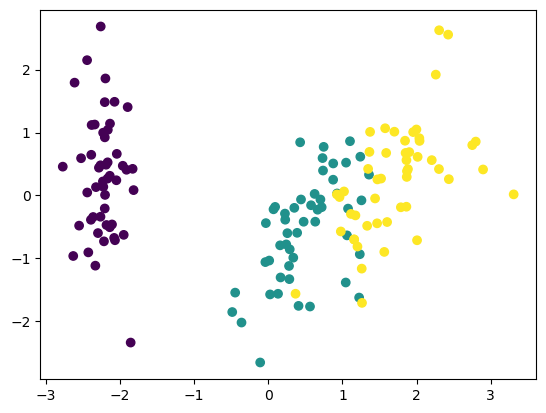

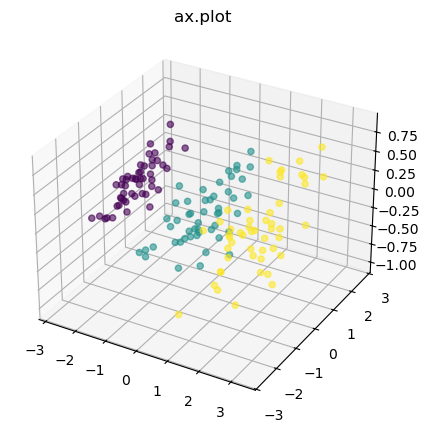

In [31]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np 

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d') # Axe3D object

sample_size = 50
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], alpha=0.6, c=df['target'])
plt.savefig('./tmp.svg')
plt.title("ax.plot")
plt.show()

## LDA 차원 축소

LDA(Linear Discriminant Analysis): 선형 판별 분석법 (PCA와 유사)

- LDA는 클래스(Class) 분리를 최대화하는 축을 찾기 위해 클래스 간 분산과 내부 분산의 비율을 최대화 하는 방식으로 차원 축소합니다.

In [34]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [35]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [36]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [37]:
data_scaled = StandardScaler().fit_transform(df.loc[:, 'sepal length (cm)': 'petal width (cm)'])

In [38]:
lda_data = lda.fit_transform(data_scaled, df['target'])

In [39]:
lda_data[:5]

array([[ 8.06179978,  0.30042062],
       [ 7.12868772, -0.78666043],
       [ 7.48982797, -0.26538449],
       [ 6.81320057, -0.67063107],
       [ 8.13230933,  0.51446253]])

시각화

In [41]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['target'])

In [42]:
plt.scatter(lda_data[:, 0], lda_data[:, 1], c=df['target'])

### SVD (Singular Value Decomposition)

[위키문서](https://ko.wikipedia.org/wiki/%ED%8A%B9%EC%9D%B4%EA%B0%92_%EB%B6%84%ED%95%B4)

- 상품의 추천 시스템에도 활용되어지는 알고리즘 (추천시스템)
- 특이값 분해기법입니다. 
- PCA와 유사한 차원 축소 기법입니다. 
- scikit-learn 패키지에서는 truncated SVD (aka LSA)을 사용합니다.


In [46]:
from sklearn.decomposition import TruncatedSVD

In [47]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [48]:
data_scaled = StandardScaler().fit_transform(df.loc[:, 'sepal length (cm)': 'petal width (cm)'])

In [49]:
svd = TruncatedSVD(n_components=2)

In [50]:
svd_data = svd.fit_transform(data_scaled)

시각화

In [52]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['target'])

In [53]:
plt.scatter(lda_data[:, 0], lda_data[:, 1], c=df['target'])

In [54]:
plt.scatter(svd_data[:, 0], svd_data[:, 1], c=df['target'])

## 군집화

### K-Means Clustering

[K-Means 알고리즘](https://ko.wikipedia.org/wiki/K-%ED%8F%89%EA%B7%A0_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98)

군집화에서 가장 대중적으로 사용되는 알고리즘입니다. centroid라는 중점을 기준으로 가장 가까운 포인트들을 선택하는 군집화 기법입니다.

**사용되는 예제**

- 스팸 문자 분류
- 뉴스 기사 분류

In [59]:
from sklearn.cluster import KMeans

In [60]:
kmeans = KMeans(n_clusters=3)

In [61]:
cluster_data = kmeans.fit_transform(df.loc[:, 'sepal length (cm)': 'petal width (cm)'])

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [62]:
cluster_data[:5]

array([[5.03132789, 0.14135063, 3.41251117],
       [5.08750645, 0.44763825, 3.38963991],
       [5.25229169, 0.4171091 , 3.56011415],
       [5.12704282, 0.52533799, 3.412319  ],
       [5.07638109, 0.18862662, 3.4603117 ]])

In [63]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [64]:
# list(df['target'])

In [65]:
sns.countplot(kmeans.labels_)

<Axes: ylabel='count'>

In [66]:
sns.countplot(df['target'])

<Axes: ylabel='count'>

In [67]:
kmeans

KMeans(n_clusters=3)

In [68]:
kmeans = KMeans(n_clusters=3, max_iter=500)
cluster_data = kmeans.fit_transform(df.loc[:, 'sepal length (cm)': 'petal width (cm)'])
sns.countplot(kmeans.labels_)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Axes: ylabel='count'>

## DBSCAN (Density-based spatial clustering of applications with noise)

밀도 기반 클러스터링

- 밀도가 높은 부분을 클러스터링 하는 방식
- 어느점을 기준으로 반경 x내에 점이 n개 이상 있으면 하나의 군집으로 인식하는 방식
- KMeans 에서는 n_cluster의 갯수를 반드시 지정해 주어야 하나, DBSCAN에서는 필요없음
- 기하학적인 clustering도 잘 찾아냄


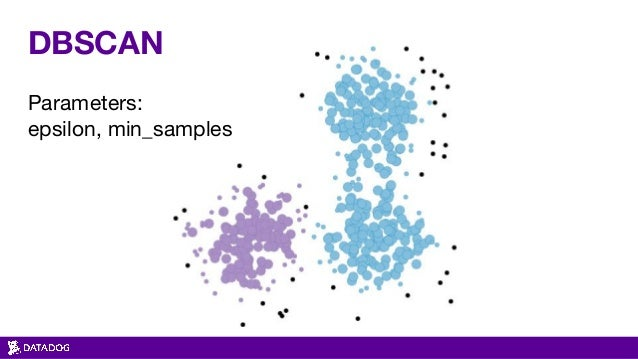

In [71]:
Image('https://image.slidesharecdn.com/pydatanyc2015-151119175854-lva1-app6891/95/pydata-nyc-2015-automatically-detecting-outliers-with-datadog-26-638.jpg')

In [72]:
from sklearn.cluster import DBSCAN

In [73]:
dbscan = DBSCAN(eps=0.3, min_samples=2)

In [74]:
dbscan_data = dbscan.fit_predict(df.loc[:, 'sepal length (cm)': 'petal width (cm)'])

In [75]:
dbscan_data

array([ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0, -1,  0,  1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  2,
        3,  2,  4,  5, -1,  3,  6,  5, -1, -1, -1, -1,  7, -1,  5,  8,  4,
        9,  4, 10, -1, -1,  7,  5,  5, -1, -1,  7, -1,  4,  4,  4, -1,  8,
       -1,  2,  9,  4,  4,  4,  7,  4,  6,  4,  4,  4,  5, -1,  4, -1, 11,
       -1, 12, -1, 13, -1, 14, -1, -1, 15, -1, 16, 11, -1, -1, 12, -1, -1,
       -1, 17, -1, 13, 10, 17, -1, 10, 10, 18, -1, 14, -1, 18, -1, -1, -1,
       19, 12, 10, 16, 17, 20, 11, 17, 17, 20, 10, 15, 19, 10],
      dtype=int64)

## 실루엣 스코어 (군집화 평가)

클러스터링의 품질을 정량적으로 평가해 주는 지표

- 1: 클러스터링의 품질이 좋다
- 0: 클러스터링의 품질이 안좋다 (클러스터링의 의미 없음)
- 음수: 잘못 분류됨

In [78]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [79]:
score = silhouette_score(data_scaled, kmeans.labels_)

In [80]:
score

0.4472199222829889

In [81]:
samples = silhouette_samples(data_scaled, kmeans.labels_)

In [82]:
samples[:5]

array([0.73288201, 0.57609965, 0.68096769, 0.6265351 , 0.72667458])

[api 참고(scikit-learn 공식 도큐먼트)](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html)

In [84]:
def plot_silhouette(X, num_cluesters):
    for n_clusters in num_cluesters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
    
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
    
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
    
            ith_cluster_silhouette_values.sort()
    
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
    
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
    
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
    
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
    
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')
    
        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')
    
        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')
    
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
    
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
    
        plt.show()

- 빨간 점선은 평균 실루엣 계수를 의미합니다.

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.5817500491982808


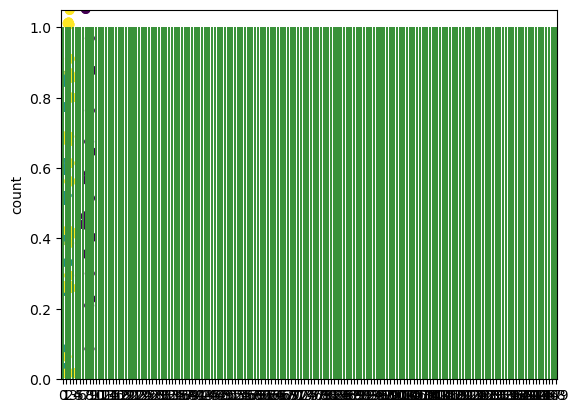

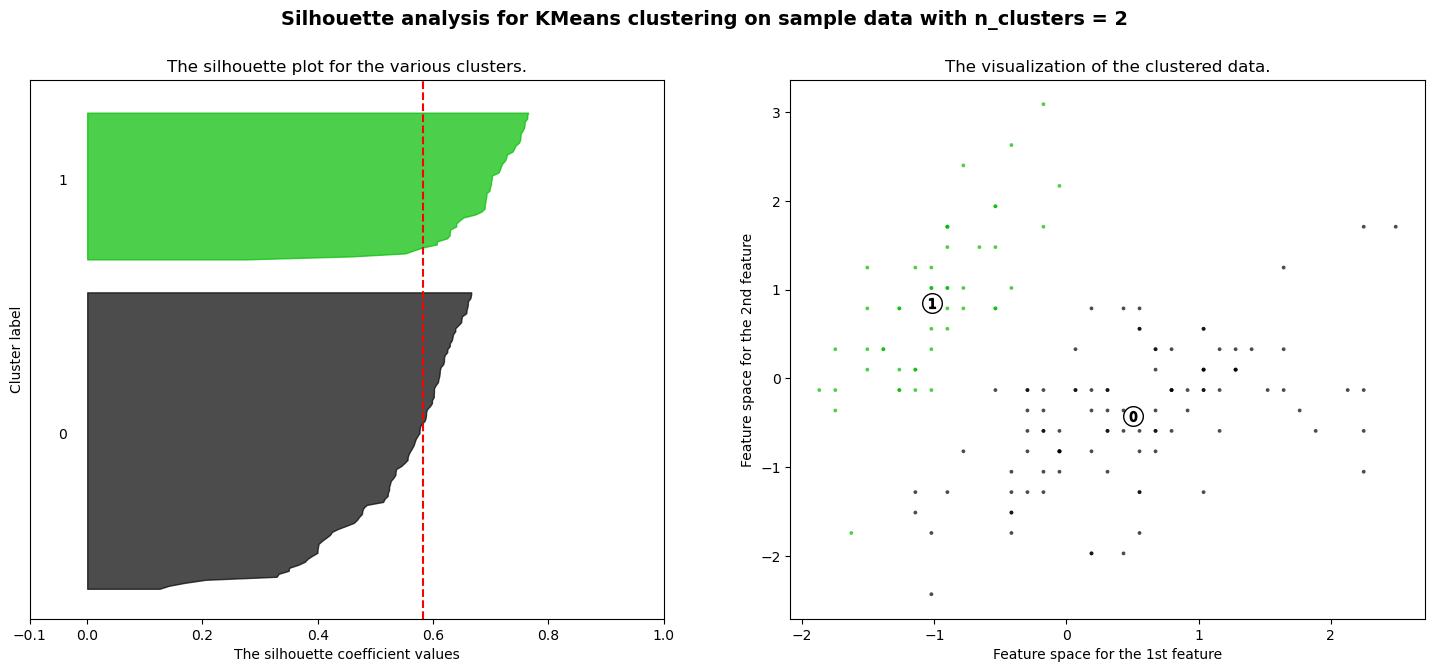

For n_clusters = 3 The average silhouette_score is : 0.4565352255831263


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


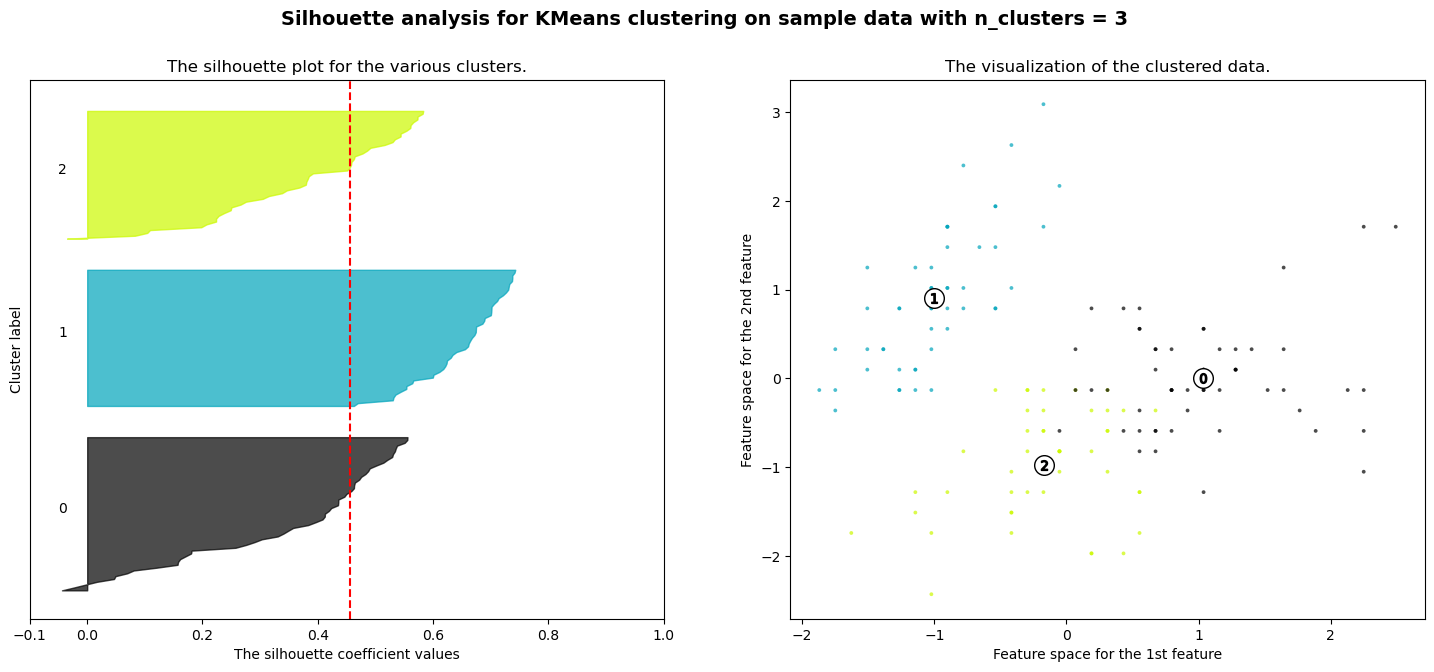

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.3850454053045392


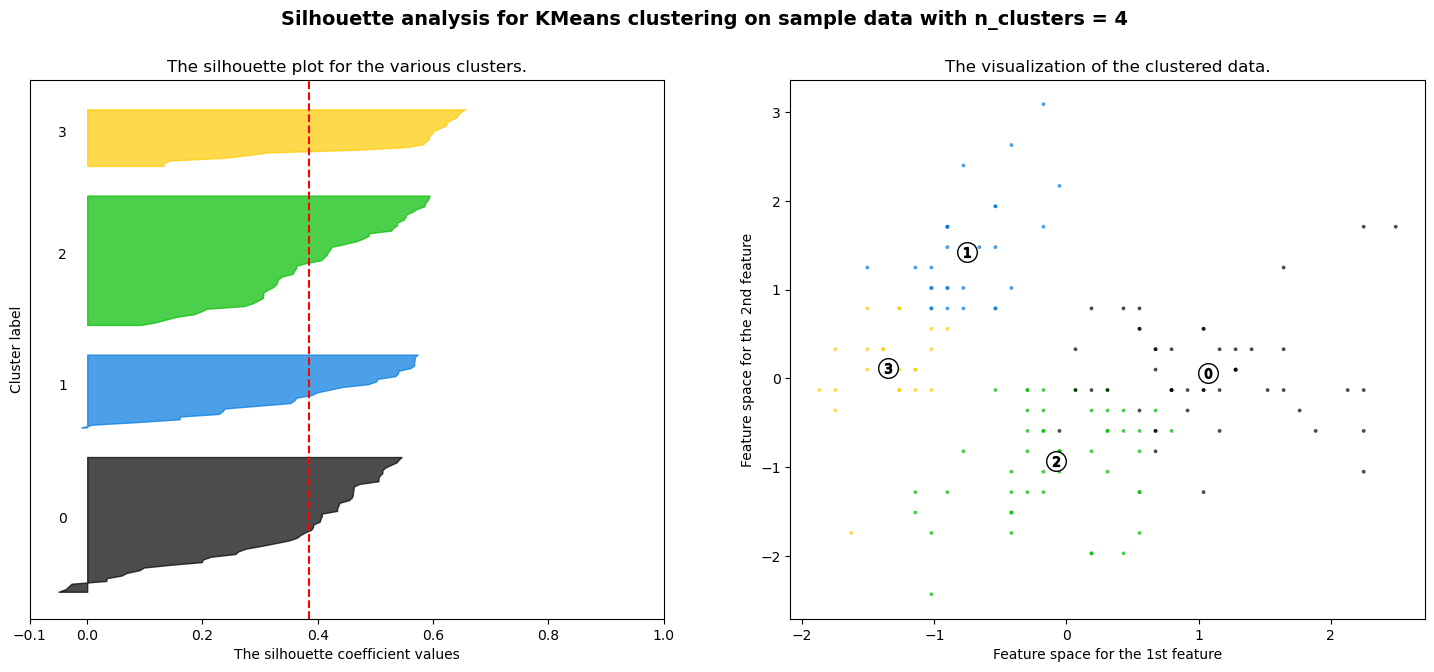

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.34380827431664635


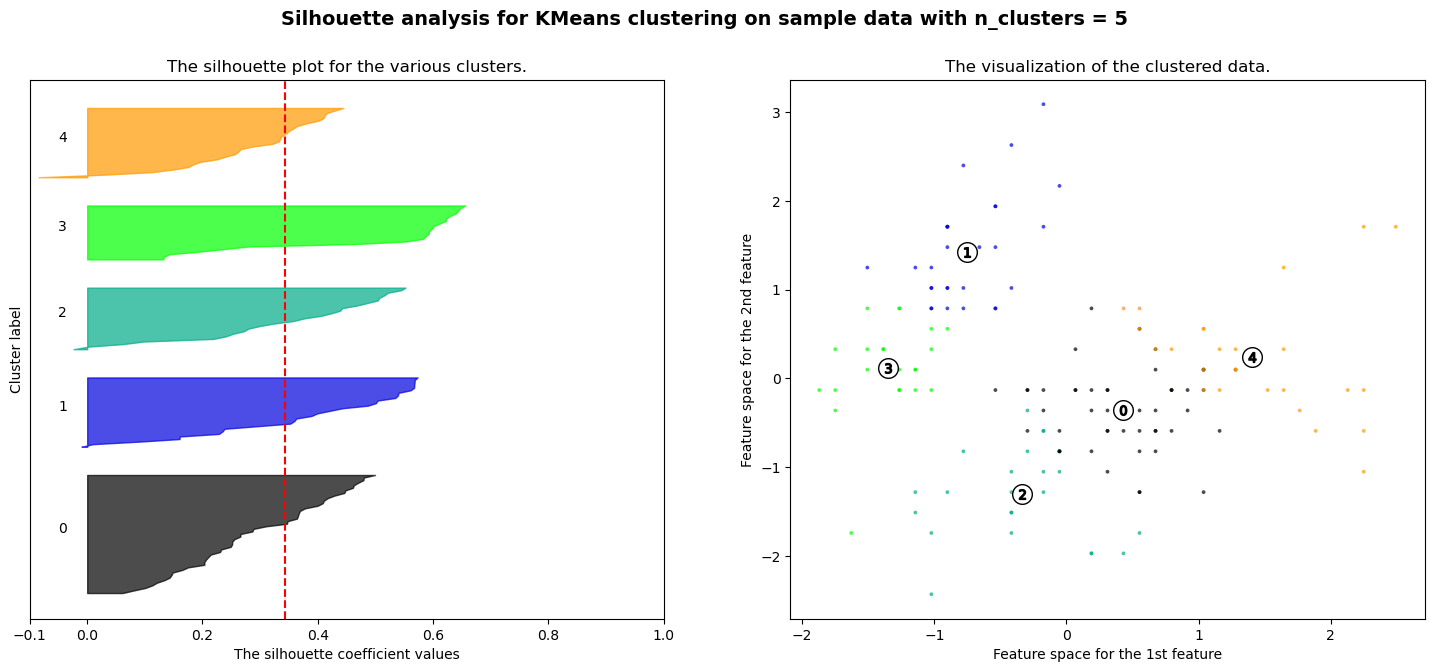

In [86]:
plot_silhouette(data_scaled, [2, 3, 4, 5])